# Code for data analysis and getting insights into regions, snippets, etc.

## Import libraries

In [1]:
# data & file processing
import pandas as pd
import numpy as np
import os
from collections import defaultdict
from collections import Counter
import yaml
import pickle
from tqdm.notebook import tqdm

# preprocessing class
import sys
sys.path.append('../DataPreprocessing')
from read_into_dicts import DocReader

# Visualisation
import matplotlib
import seaborn as sns

# ML
from transformers import AutoTokenizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure nltk resources are available
nltk.download('punkt')
nltk.download('stopwords')

/home/tlh45/project/code/.venv/lib64/python3.11/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2024-05-31 10:43:09.207362: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-31 10:43:10.865712: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 10:43:14.381755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package punkt to /home/tlh45/nltk_data...
[nltk_data]   Pack

True

In [2]:
# Load configuration
with open('../Model/configs/config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# GENERAL:
MODEL = config["general"]["MODEL"]
DATA_SIZE = config["general"]["DATA_SIZE"]
DATA_DICT_FILE_PATH = config["general"]['DATA_DICT_FILE_PATH']['AML']
DATA_PATH = config["general"]["DATA_PATH"]

tokenizer = AutoTokenizer.from_pretrained(MODEL)

matplotlib.rcParams['font.family'] = 'Times New Roman'

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

#### Preprocess data

In [3]:
docReader = DocReader(MODEL, tokenizer)
create_original_snippets = True
add_full_page = False

with open(f'{DATA_PATH}/{config["general"]["DATA_DICT_FILE_PATH"]["AML"]}', 'rb') as handle:
        data_dict_aml = pickle.load(handle)
        
with open(f'{DATA_PATH}/{config["general"]["DATA_DICT_FILE_PATH"]["CYBER_I"]}', 'rb') as handle:
        data_dict_cyber_i = pickle.load(handle)
        

with open(f'{DATA_PATH}/{config["general"]["DATA_DICT_FILE_PATH"]["CYBER_II"]}', 'rb') as handle:
        data_dict_cyber_ii = pickle.load(handle)

'\nif DATA_DICT_FILE_PATH:\n    with open(f\'{DATA_PATH}/{DATA_DICT_FILE_PATH}\', \'rb\') as handle:\n        data_dict_aml = pickle.load(handle)\nelse:\n    data_dict = docReader.preprocess_folder(preprocess=False, folder_path=f\'{DATA_PATH}/28245V231219\', num_workers=min(70, cpu_count()), data_size=DATA_SIZE, chunksize=1\n                                        , extract_title=True, extract_doc_long_id=True, refine_regions=True, create_original_snippets=create_original_snippets, add_full_page=add_full_page\n                                        , data_dict_folder=f"{DATA_PATH}/preprocessing/data_dicts", file_name_additional_suffix="-22-02")\n'

## Get basic info about xml files

### Analyse origin of documents

In [ ]:
len(data_dict_aml)

1149

In [4]:
doc_ids_total = []
countries_total = []
publishers_total = []

data_dicts = {
    'AML': data_dict_aml,
    'CYBER_I': data_dict_cyber_i,
    'CYBER_II': data_dict_cyber_ii
}

data_dfs = {
    'AML': None,
    'CYBER_I': None,
    'CYBER_II': None
}

for name, data_dict in data_dicts.items():
    doc_ids = []
    countries = []
    publishers = []
    # Iterate through data_dict
    for doc_id, info in tqdm(data_dict.items()):
        doc_long_id = info.get('doc_long_id', '')
        country = doc_long_id.split("=")[1][:2]
        publisher = doc_long_id.split("!")[0][13:]

        doc_ids.append(doc_id)
        countries.append(country)
        publishers.append(publisher)
        doc_ids_total.append(doc_id)
        countries_total.append(country)
        publishers_total.append(publisher)

    df = pd.DataFrame({
        'doc_id': doc_ids,
        'country': countries,
        'publisher': publishers
    })
    
    data_dfs[name] = df

    print(name)
    df.to_csv(f"doc_origins_{name}.csv", index=False)
    print(len(df), "documents")
    print(len(set(countries)), "unique countries")
    print(len(set(publishers)), "unique publishers")
    display(df.head(10))

print("Total number of documents:", len(doc_ids_total))
print("Total number of countries:", len(set(countries_total)))
print("Total number of publishers:", len(set(publishers_total)))

  0%|          | 0/1149 [00:00<?, ?it/s]

AML
1149 documents
74 unique countries
181 unique publishers


,doc_id,country,publisher
0,27367085,ca,on-securities-commission
1,22206856,eu,council-of-the-european-union
2,22348898,us,congress
3,22243253,sg,monetary-authority-of-singapore
4,20583672,hk,hong-kong-securities-and-futures-commission
5,25396584,ky,financial-reporting-authority
6,20867278,bb,financial-intelligence-unit
7,20032040,je,states-assembly
8,24899346,us,financial-crimes-enforcement-network
9,20518933,hk,hong-kong-insurance-authority


  0%|          | 0/729 [00:00<?, ?it/s]

CYBER_I
729 documents
15 unique countries
88 unique publishers


,doc_id,country,publisher
0,26602954,eu,european-union-agency-for-network-and-informat...
1,27968745,us,board-of-governors-of-the-federal-reserve-system
2,27425862,uk,uk-government
3,27722278,us,securities-and-exchange-commission
4,31617746,us,board-of-governors-of-the-federal-reserve-system
5,30029017,us,office-of-the-comptroller-of-the-currency
6,26990323,uk,national-cyber-security-centre
7,26860040,us,federal-financial-institutions-examination-cou...
8,26801275,us,national-institute-of-standards-and-technology
9,31844841,gg,guernsey-financial-services-commission


  0%|          | 0/965 [00:00<?, ?it/s]

CYBER_II
965 documents
65 unique countries
169 unique publishers


,doc_id,country,publisher
0,20655617,uk,national-cyber-security-centre
1,22348726,cl,csirt
2,22336174,ca,canadian-centre-for-cyber-security
3,22676604,us,commodity-futures-trading-commission
4,22672457,uk,national-cyber-security-centre
5,25209216,ca,qc-autorite-des-marches-financiers
6,20738540,ng,national-information-technology-development-ag...
7,20836689,ca,bc-securities-commission
8,20012635,uk,parliament-of-the-united-kingdom
9,22199125,ca,canadian-centre-for-cyber-security


Total number of documents: 2843
Total number of countries: 84
Total number of publishers: 277


In [5]:
all_countries = []
for data_dict in tqdm([data_dict_aml, data_dict_cyber_i, data_dict_cyber_ii]):
    for doc_id, info in tqdm(data_dict.items()):
        doc_long_id = info.get('doc_long_id', '')
        country = doc_long_id.split("=")[1][:2]
        all_countries.append(country)
        
print(len(set(all_countries)))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1149 [00:00<?, ?it/s]

  0%|          | 0/729 [00:00<?, ?it/s]

  0%|          | 0/965 [00:00<?, ?it/s]

84


### Create map of jurisdictions in the datasets

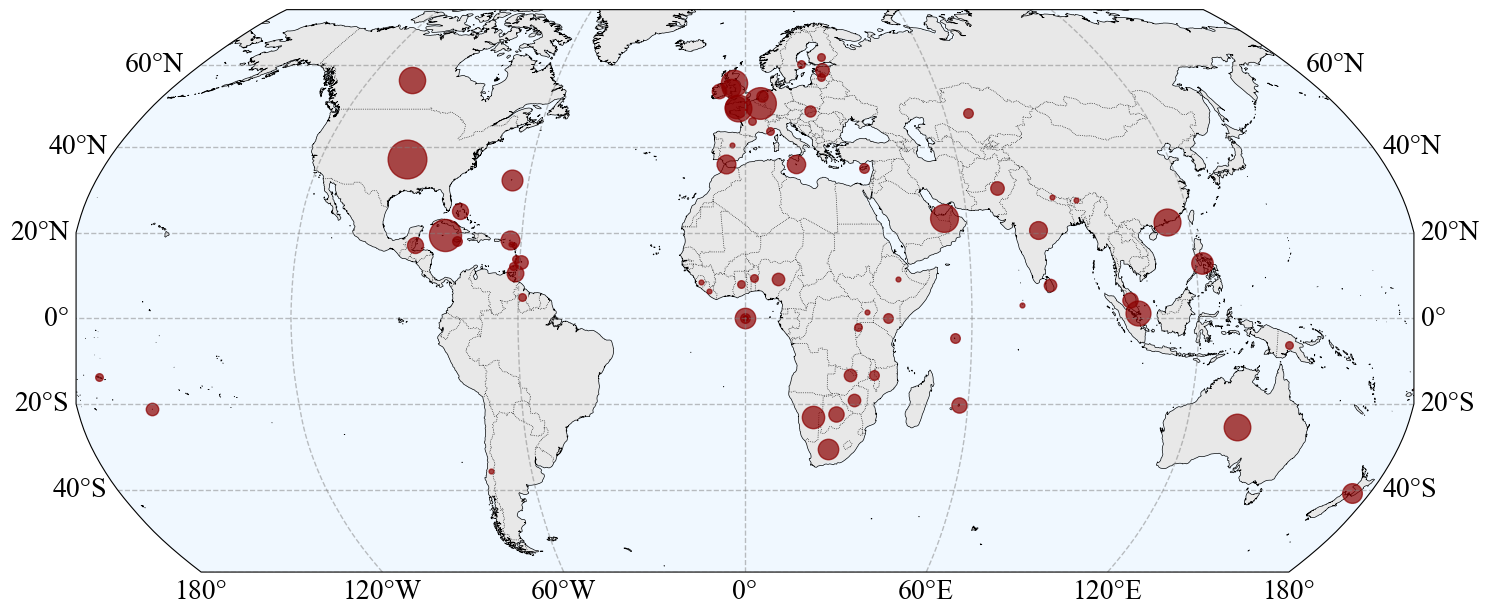

Successfully mapped 73 countries.


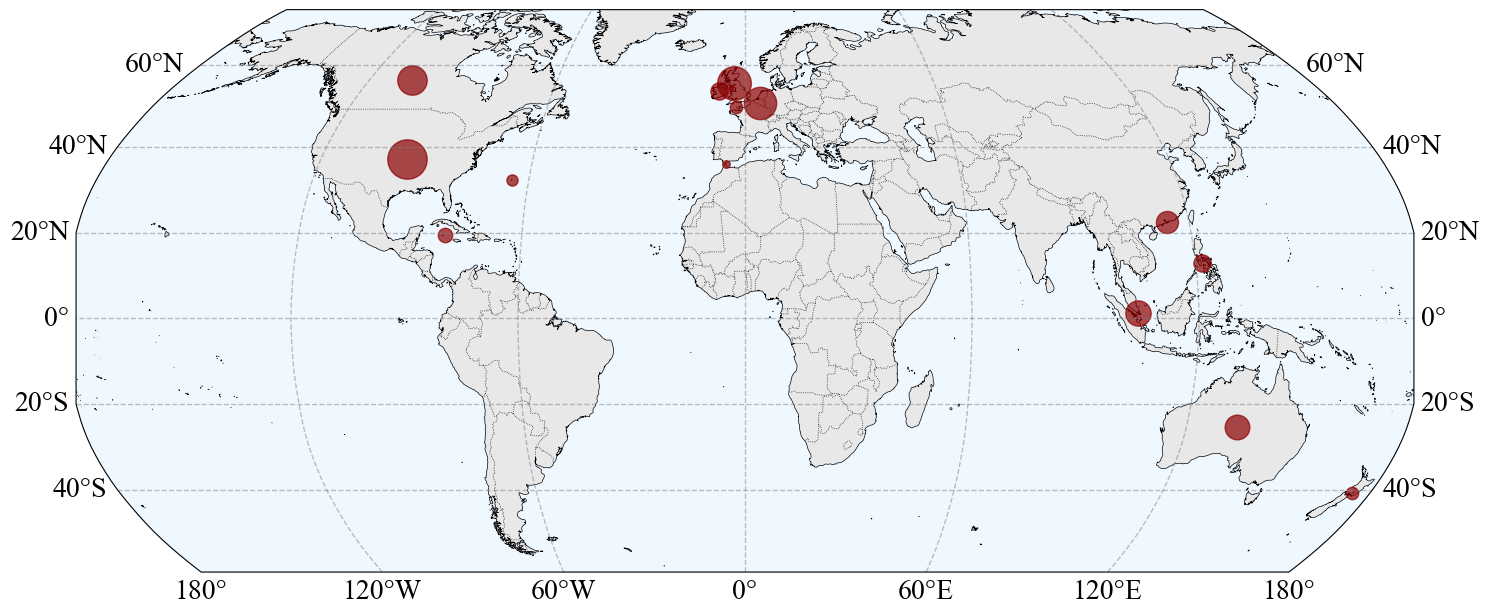

Successfully mapped 15 countries.


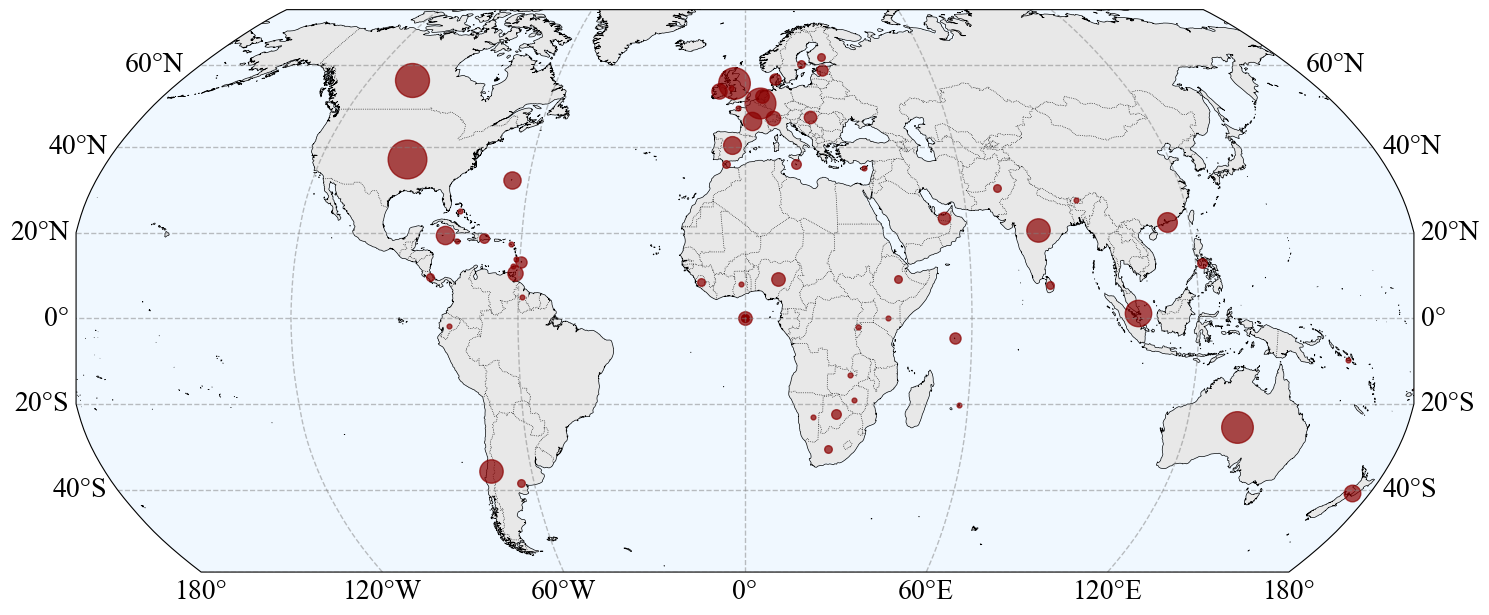

Successfully mapped 64 countries.


In [5]:
import pycountry
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Manual mapping for special cases or corrections
special_cases = {
    'eu': 'Belgium', # we move the EU to Belgium for better visualisation in map
    'uk': 'United Kingdom',  
}

def get_country_name(alpha_2_code, return_eu = False):
    '''
    Function to pull country name from pycountry library
    '''
    
    # Handle special cases
    if alpha_2_code.lower() in special_cases:
        if alpha_2_code.lower() == "eu" and return_eu:
            return "European Union"
        return special_cases[alpha_2_code.lower()]
    # Get country name
    try:
        return pycountry.countries.get(alpha_2=alpha_2_code).name
    except AttributeError:
        return 'Unknown'

for name, df in data_dfs.items():
    df_transformed = df.copy()
    df_transformed['country_name'] = df_transformed['country'].apply(get_country_name)

    df_counts = df_transformed.groupby('country_name').size().reset_index(name='counts')
    countries_df = pd.read_csv('countries.csv')

    # Merge df_counts with countries_df to get latitude and longitude for each country
    df_merged = pd.merge(df_counts, countries_df, left_on='country_name', right_on='name', how='left')

    ####### Create map:

    show_full_map = False
    fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.Robinson()})
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':', linewidth=0.5)
    ax.add_feature(cfeature.LAND.with_scale('110m'), alpha=0.5, color='lightgray')
    ax.add_feature(cfeature.OCEAN.with_scale('110m'), color='aliceblue')

    if show_full_map:
        ax.set_global()
    else:
        ax.set_extent([-180, 180, -60, 75], crs=ccrs.PlateCarree()) # We set the extent manually for better and consistent visualisation

    # Customise plot gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.left_labels = gl.right_labels = True 
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.top_labels = False
    gl.bottom_labels = True 
    gl.xlabel_style = {'size': 20, 'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 20, 'color': 'black', 'weight': 'bold'}

    # Plot each country using latitude and longitude from the merged DataFrame
    counter = 0
    for index, row in df_merged.iterrows():
        lat = row['latitude']
        lon = row['longitude']
        counts = row['counts']
        size = np.log1p(counts) * 5  # Using log scale for better size differentiation

        marker = ax.plot(lon, lat, 'o', markersize=size, color='darkred', alpha=0.7, transform=ccrs.Geodetic())
        
        counter += 1

    plt.tight_layout()
    # plt.savefig(f'document_origins_worldwide_{name}.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

    plt.show()

    print(f"Successfully mapped {counter} countries.")

### Create tabels with all data
(Table B.1 in the report)

In [6]:
df_country_counts = pd.DataFrame()

# Dictionary to store unique publishers by country
unique_publishers = {}
for name, data_dict in data_dicts.items():
    doc_ids = []
    countries = []
    publishers = []

    # Extract data
    for doc_id, info in tqdm(data_dict.items()):
        doc_long_id = info.get('doc_long_id', '')
        country_code = doc_long_id.split("=")[1][:2]
        country_name = get_country_name(country_code, return_eu = True)
        publisher_id = doc_long_id.split("!")[0][13:]

        doc_ids.append(doc_id)
        countries.append(country_name)
        publishers.append(publisher_id)

        # Update unique publishers dictionary
        if country_name not in unique_publishers:
            unique_publishers[country_name] = set()
        unique_publishers[country_name].add(publisher_id)

    # Create temporary DataFrame
    temp_df = pd.DataFrame({
        'country': countries,
        'count': 1  # count column used to aggregate
    })

    # Aggregate counts by country
    temp_counts = temp_df.groupby('country').count().rename(columns={'count': name}).reset_index()

    # Merge into main DataFrame
    if df_country_counts.empty:
        df_country_counts = temp_counts
    else:
        df_country_counts = df_country_counts.merge(temp_counts, on='country', how='outer')

# Create DataFrame for unique publishers
publisher_data = [(country, len(publishers_set)) for country, publishers_set in unique_publishers.items()]
df_publishers = pd.DataFrame(publisher_data, columns=['country', 'unique_publishers']
)
df_country_counts = df_country_counts.merge(df_publishers, on='country', how='left')
df_country_counts.fillna(0, inplace=True)

# Sort DataFrame by country names
df_country_counts.sort_values('country', ascending=True, inplace=True)

# Add ID column
df_country_counts.reset_index(drop=True, inplace=True)
df_country_counts.index.name = 'ID'
df_country_counts.reset_index(inplace=True)

# Update column names to include publishers count
df_country_counts.columns = ["ID", "Country", "AML", "CYBER I", "CYBER II", "Publishers"]

# Split DataFrame in half (we do this get two tables for our report)
midpoint = np.ceil(len(df_country_counts) / 2).astype(int)
df_first_half = df_country_counts.iloc[:midpoint]
df_second_half = df_country_counts.iloc[midpoint:]

# Generate LaTeX code for both halves
latex_first_half = df_first_half.to_latex(index=False, header=True, column_format='clcccc', longtable=False, escape=True,
                                          float_format="{:0.0f}".format)

latex_second_half = df_second_half.to_latex(index=False, header=True, column_format='clcccc', longtable=False, escape=True,
                                            float_format="{:0.0f}".format)

latex_document = f"""
\\begin{{sidewaystable}}
\\scriptsize
\\centering
\\begin{{minipage}}{{0.5\\textwidth}}
\\centering
{latex_first_half}
\\end{{minipage}}%
\\hfill
\\begin{{minipage}}{{0.5\\textwidth}}
\\centering
{latex_second_half}
\\end{{minipage}}

\\caption{{Dataset structure: number of documents containing FRI by theme and number of publishers per country.}}
\\label{{tab:doc_counts_by_dict}}
\\end{{sidewaystable}}
"""

print(latex_document)

  0%|          | 0/1149 [00:00<?, ?it/s]

  0%|          | 0/729 [00:00<?, ?it/s]

  0%|          | 0/965 [00:00<?, ?it/s]


\begin{sidewaystable}
\scriptsize
\centering
\begin{minipage}{0.5\textwidth}
\centering
\begin{tabular}{clcccc}
\toprule
ID & Country & AML & CYBER I & CYBER II & Publishers \\
\midrule
0 & Anguilla & 14 & 0 & 0 & 2 \\
1 & Antigua and Barbuda & 1 & 0 & 0 & 1 \\
2 & Argentina & 0 & 0 & 2 & 2 \\
3 & Australia & 45 & 34 & 94 & 10 \\
4 & Bahamas & 9 & 0 & 1 & 2 \\
5 & Barbados & 6 & 0 & 4 & 7 \\
6 & Belgium & 12 & 0 & 5 & 4 \\
7 & Belize & 9 & 0 & 0 & 3 \\
8 & Benin & 2 & 0 & 0 & 1 \\
9 & Bermuda & 19 & 4 & 11 & 4 \\
10 & Bhutan & 1 & 0 & 1 & 2 \\
11 & Bolivia, Plurinational State of & 0 & 0 & 2 & 1 \\
12 & Botswana & 8 & 0 & 3 & 4 \\
13 & Brunei Darussalam & 1 & 0 & 6 & 2 \\
14 & Canada & 43 & 68 & 132 & 29 \\
15 & Cayman Islands & 101 & 7 & 13 & 4 \\
16 & Chile & 1 & 0 & 28 & 3 \\
17 & Cook Islands & 5 & 0 & 0 & 2 \\
18 & Costa Rica & 0 & 0 & 2 & 1 \\
19 & Cyprus & 3 & 0 & 1 & 2 \\
20 & Côte d'Ivoire & 0 & 0 & 1 & 1 \\
21 & Denmark & 0 & 0 & 4 & 1 \\
22 & Dominican Republic & 0 & 0 & 3 

#### Top publishers

publisher
financial-crimes-enforcement-network    114
financial-reporting-authority            86
treasury                                 73
european-parliament                      43
financial-intelligence-unit              39
financial-intelligence-centre            32
monetary-authority-of-singapore          31
financial-services-commission            30
australian-parliament                    29
du-financial-services-authority          28
Name: doc_id, dtype: int64

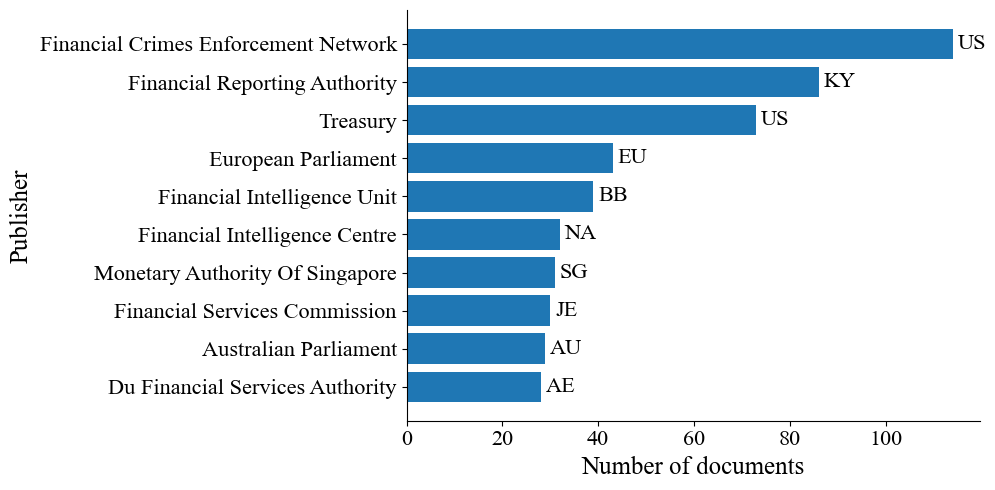

publisher
national-cyber-security-centre                                107
european-union-agency-for-network-and-information-security     74
national-institute-of-standards-and-technology                 62
cybersecurity-infrastructure-security-agency                   38
office-of-the-comptroller-of-the-currency                      30
securities-and-exchange-commission                             30
board-of-governors-of-the-federal-reserve-system               28
national-futures-association                                   18
canadian-centre-for-cyber-security                             16
cyber-security-agency-of-singapore                             15
Name: doc_id, dtype: int64

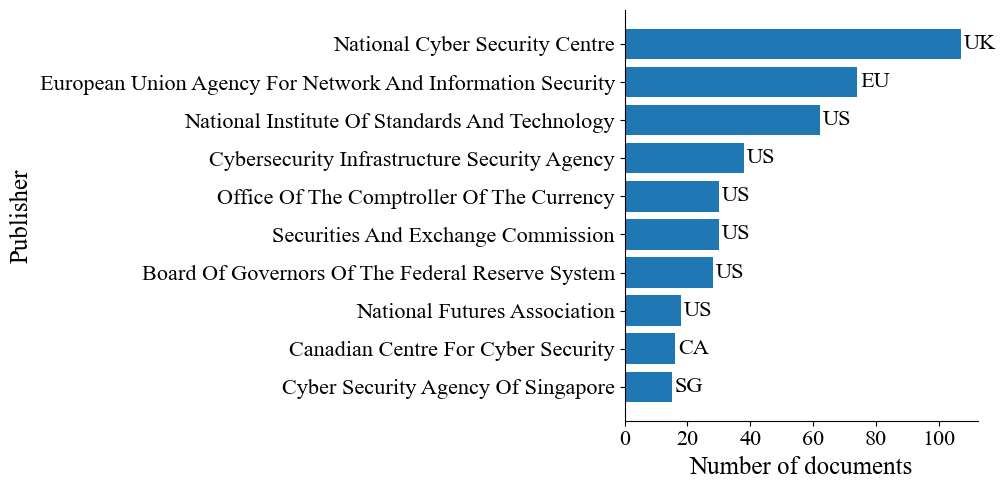

publisher
national-cyber-security-centre                                83
national-institute-of-standards-and-technology                71
australian-cyber-security-centre                              53
european-union-agency-for-network-and-information-security    51
canadian-centre-for-cyber-security                            45
cybersecurity-infrastructure-security-agency                  29
office-of-the-comptroller-of-the-currency                     28
csirt                                                         25
board-of-governors-of-the-federal-reserve-system              24
securities-and-exchange-commission                            23
Name: doc_id, dtype: int64

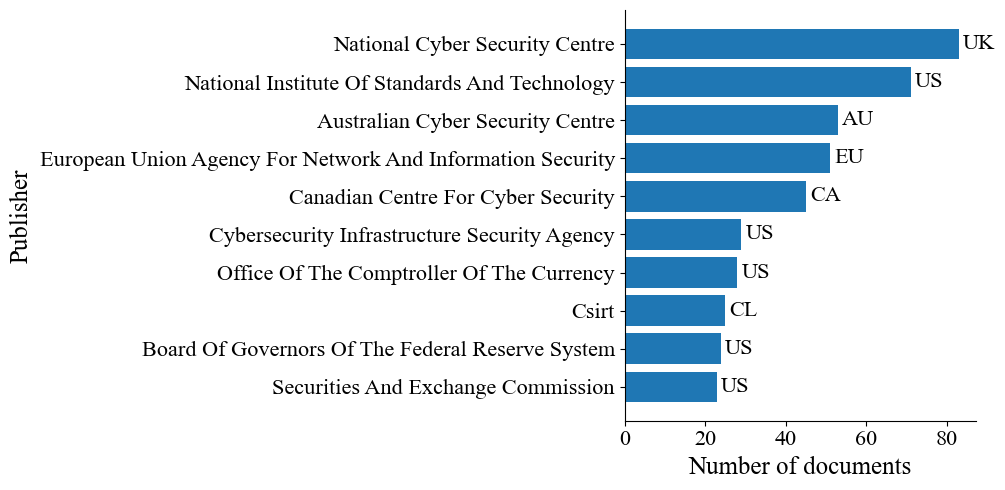

In [9]:
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_palette)

os.makedirs('plots', exist_ok=True)

for name, df in data_dfs.items():
    top_publishers = df.groupby('publisher')['doc_id'].count().sort_values(ascending=False).head(10)
    publisher_countries = df.drop_duplicates('publisher').set_index('publisher')['country']

    display(top_publishers)
    plt.figure(figsize=(10, 5))
    top_publishers_names = [" ".join(part.title() for part in publisher.split("-")) for publisher in top_publishers.index] # get proper formatting for publisher names
    bars = plt.barh(top_publishers_names, top_publishers.values, color=color_palette[0])

    # Annotate each bar
    for bar, publisher in zip(bars, top_publishers.index):
        country = publisher_countries[publisher]
        text_x = bar.get_width() + 1
        text_color = 'black'
        plt.text(text_x, bar.get_y() + bar.get_height() / 2, f'{country.upper()}',
                 va='center', ha='left', color=text_color, fontweight='bold', fontsize=16)

    plt.xlabel('Number of documents', fontsize=18)
    plt.ylabel('Publisher', fontsize=18)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.savefig(f'plots/{name}_top_publishers.pdf', format='pdf', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

### Extract High-Level information from dict

In [6]:
data_dict = data_dict_aml

In [7]:
doc_count = 0
total_pages = 0
total_pages_with_regions = 0
total_blocks = 0
total_regions = 0
total_snippets = 0
total_tags_in_blocks = 0
total_tags_in_regions = 0
total_block_text_length = 0
total_region_text_length = 0
total_snippet_text_length = 0

pages_per_doc = defaultdict(int)
blocks_per_doc = defaultdict(int)
blocks_per_page = []
regions_per_doc = defaultdict(int)
regions_per_page = []
snippets_per_doc = defaultdict(int)
snippets_per_page = []

tags_per_block = []
tags_per_region = []

page_lengths = []
block_text_lengths = []
region_text_lengths = []
snippet_text_lengths = []

tagged_texts_in_blocks_per_doc = defaultdict(int)
tagged_texts_in_regions_per_doc = defaultdict(int)

snippet_character_type_counts = Counter()
# define names for character types:
character_type_descriptions = {
    0: "e.g. article 1 or article1",
    1: "e.g. '1.'",
    2: "e.g. '(1)'",
    3: "e.g. '1)'",
    4: "e.g. '1)' or '1 '",
    5: "e.g. '1.1.'",
    6: "e.g. '1.1.1.'",
    7: "e.g. '1-1'",
    8: "e.g. 'letterletter' all combinations until 'ez'",
    9: "e.g. 'article I'",
    10: "e.g. 'article (1)'",
    11: "e.g. 'rule 1'",
    12: "e.g. artículo 1 or artículo1",
    13: "e.g. 'artículo I'",
    None: "Split by Size\n(i.e. no type found)"
}

data = []

# iterate over data dict
for doc_id, pages in tqdm(data_dict.items(), desc="Processing documents"):
    doc_count += 1

    # go through all pages
    for page_index, content in pages.items():
        
        if page_index in ['title', 'doc_long_id']:
            continue
        
        # count pages
        pages_per_doc[doc_id] += 1
        total_pages += 1

        # get blocks of page
        blocks = content['blocks']
        num_blocks = len(blocks)
        blocks_per_doc[doc_id] += num_blocks
        total_blocks += num_blocks
        blocks_per_page.append(num_blocks)
        
        # get regions of page
        regions = content['regions']
        num_regions = len(regions)
        regions_per_doc[doc_id] += num_regions
        total_regions += num_regions
        regions_per_page.append(num_regions)
        
        if num_regions > 0:
            total_pages_with_regions += 1

        # get snippets of page
        snippets = content['snippets']
        num_snippets = len(snippets)
        snippets_per_doc[doc_id] += num_snippets
        total_snippets += num_snippets
        snippets_per_page.append(num_snippets)

        page_token_count = 0

        # blocks analysis
        for block in blocks:
            # write in df
            data.append({
                'doc_id': doc_id,
                'page_index': page_index,
                'type': 'block',
                'text_length': len(block['tokenized_text']),
                'tags_count': len(block['tags'])
            })

            # text
            block_text_length = len(block['tokenized_text'])
            total_block_text_length += block_text_length
            block_text_lengths.append(block_text_length)
            page_token_count += block_text_length

            # tags
            block_tags_count = len(block['tags'])
            total_tags_in_blocks += block_tags_count
            tagged_texts_in_blocks_per_doc[doc_id] += block_tags_count
            tags_per_block.append(block_tags_count)

        page_lengths.append(page_token_count)

        # region analysis
        for region in regions:
            # write in df
            data.append({
                'doc_id': doc_id,
                'page_index': page_index,
                'type': 'region',
                'text_length': len(region['tokenized_text']),
                'tags_count': len(region['tags'])
            })

            # text       
            region_text_length = len(region['tokenized_text'])
            total_region_text_length += region_text_length
            region_text_lengths.append(region_text_length)
            
            # tags
            region_tags_count = len(region['tags'])
            total_tags_in_regions += region_tags_count
            tagged_texts_in_regions_per_doc[doc_id] += region_tags_count
            tags_per_region.append(region_tags_count)

        # snippets analysis
        for snippet in snippets:
            # write in df
            data.append({
                'doc_id': doc_id,
                'page_index': page_index,
                'type': 'snippet',
                'text_length': len(snippet['tokenized_text']),
                'character_type': snippet['snippet_character_type']
            })

            # text       
            snippet_text_length = len(snippet['tokenized_text'])
            total_snippet_text_length += snippet_text_length
            snippet_text_lengths.append(snippet_text_length)

            # count snippet character types
            snippet_character_type = snippet['snippet_character_type']
            snippet_character_type_counts[snippet_character_type] += 1

df = pd.DataFrame(data)          

# finding min and max
min_block_text_length = min(block_text_lengths)
max_block_text_length = max(block_text_lengths)
min_tags_per_block = min(tags_per_block)
max_tags_per_block = max(tags_per_block)

min_region_text_length = min(region_text_lengths)
max_region_text_length = max(region_text_lengths)
min_tags_per_region = min(tags_per_region)
max_tags_per_region = max(tags_per_region)

min_snippet_text_length = min(snippet_text_lengths) if snippet_text_lengths else 0
max_snippet_text_length = max(snippet_text_lengths) if snippet_text_lengths else 0

min_page_length = min(page_lengths) if page_lengths else 0
max_page_length = max(page_lengths) if page_lengths else 0

# Calculating averages
avg_pages_per_doc = total_pages / doc_count if doc_count else 0

avg_blocks_per_doc = total_blocks / doc_count if doc_count else 0
avg_blocks_per_page = total_blocks / total_pages if total_pages else 0
avg_regions_per_doc = total_regions / doc_count if doc_count else 0
avg_regions_per_page = total_regions / total_pages if total_pages else 0
avg_snippets_per_doc = total_snippets / doc_count if doc_count else 0
avg_snippets_per_page = total_snippets / total_pages if total_pages else 0

avg_tags_per_block = total_tags_in_blocks / total_blocks if total_blocks else 0
avg_tags_per_region = total_tags_in_regions / total_regions if total_regions else 0
avg_block_text_length = total_block_text_length / total_blocks if total_blocks else 0
avg_region_text_length = total_region_text_length / total_regions if total_regions else 0
avg_snippet_text_length = total_snippet_text_length / total_snippets if total_snippets else 0

avg_page_length = sum(page_lengths) / len(page_lengths) if page_lengths else 0

# Print the collected high-level information
print("*Documents* Total number:", doc_count)
print("*Pages* Total number:", total_pages, ", avg per document:", avg_pages_per_doc)
print("*Blocks* Total number:", total_blocks, ", avg per document:", avg_blocks_per_doc, ", avg per page:", avg_blocks_per_page)
print("*Regions* Total number:", total_regions, ", avg per document:", avg_regions_per_doc, ", avg per page:", avg_regions_per_page)
print("*Pages with Regions* Total number:", total_pages_with_regions)
print("*Snippets* Total number:", total_snippets, ", avg per document:", avg_snippets_per_doc, ", avg per page:", avg_snippets_per_page)
print("*Tags* avg number per block:", avg_tags_per_block, ", avg number per region:", avg_tags_per_region, 
      ", min per block:", min_tags_per_block, ", max per block:", max_tags_per_block,
      ", min per region:", min_tags_per_region, ", max per region:", max_tags_per_region)
print("*Text* avg length per block:", avg_block_text_length, ", avg length per region:", avg_region_text_length,
      ", min length per block:", min_block_text_length, ", max length per block:", max_block_text_length,
      ", min length per region:", min_region_text_length, ", max length per region:", max_region_text_length,
      ", avg length per snippet:", avg_snippet_text_length, ", min length per snippet:", min_snippet_text_length,
      ", max length per snippet:", max_snippet_text_length, ", avg length per page:", avg_page_length, "Min page length:", min_page_length,"Max page length:", max_page_length)

print("\n*Snippet Character Type Counts*")
for snippet_type, count in snippet_character_type_counts.items():
    description = character_type_descriptions.get(snippet_type, "Unknown character type")
    print(f"{snippet_type} {description}: {count}")

Processing documents:   0%|          | 0/1149 [00:00<?, ?it/s]

*Documents* Total number: 1149
*Pages* Total number: 48075 , avg per document: 41.84073107049608
*Blocks* Total number: 163498 , avg per document: 142.29590948651 , avg per page: 3.400894435777431
*Regions* Total number: 43053 , avg per document: 37.469973890339425 , avg per page: 0.8955382215288612
*Pages with Regions* Total number: 23894
*Snippets* Total number: 88942 , avg per document: 77.40818102697999 , avg per page: 1.850067602704108
*Tags* avg number per block: 0.47116784303171905 , avg number per region: 1.000743269923118 , min per block: 0 , max per block: 8 , min per region: 1 , max per region: 2
*Text* avg length per block: 194.77139781526378 , avg length per region: 234.5460014400855 , min length per block: 0 , max length per block: 3007 , min length per region: 3 , max length per region: 1985 , avg length per snippet: 358.3252119358683 , min length per snippet: 0 , max length per snippet: 2029 , avg length per page: 662.3969630785232 Min page length: 0 Max page length: 30

AML:
- *Documents* Total number: 1149
- *Pages* Total number: 48075 , avg per document: 41.84073107049608
- *Blocks* Total number: 163498 , avg per document: 142.29590948651 , avg per page: 3.400894435777431
- *Regions* Total number: 43053 , avg per document: 37.469973890339425 , avg per page: 0.8955382215288612
- *Pages with Regions* Total number: 23894
- *Snippets* Total number: 88942 , avg per document: 77.40818102697999 , avg per page: 1.850067602704108
- *Tags* avg number per block: 0.47116784303171905 , avg number per region: 1.000743269923118 , min per block: 0 , max per block: 8 , min per region: 1 , max per region: 2
- *Text* avg length per block: 194.77139781526378 , avg length per region: 234.5460014400855 , min length per block: 0 , max length per block: 3007 , min length per region: 3 ,  max length per region: 1985 , avg length per snippet: 358.3252119358683 , min length per snippet: 0 , max length per snippet: 2029 , avg length per page: 662.3969630785232 Min page length: 0 Max page length: 3007

CYBER_I:
- *Documents* Total number: 729
- *Pages* Total number: 24512 , avg per document: 33.6241426611797
- *Blocks* Total number: 35640 , avg per document: 48.888888888888886 , avg per page: 1.453981723237598
- *Regions* Total number: 4905 , avg per document: 6.728395061728395 , avg per page: 0.20010607049608356
- *Pages with Regions* Total number: 3196
- *Snippets* Total number: 43486 , avg per document: 59.65157750342936 , avg per page: 1.7740698433420365
- *Tags* avg number per block: 0.2164421997755331 , avg number per region: 1.0756371049949032 , min per block: 0 , max per block: 15 , min per region: 1 , max per region: 6
- *Text* avg length per block: 443.3715768799102 , avg length per region: 219.35229357798164 , min length per block: 2 , max length per block: 3108 , min length per region: 6 , max length per region: 1700 , avg length per snippet: 363.3842386055282 , min length per snippet: 0 , max length per snippet: 2584 , avg length per page: 644.654169386423 Min page length: 0 Max page length: 3108

CYBER_II:
- *Documents* Total number: 965
- *Pages* Total number: 29058 , avg per document: 30.111917098445595
- *Blocks* Total number: 55089 , avg per document: 57.087046632124355 , avg per page: 1.8958290315919883
- *Regions* Total number: 10199 , avg per document: 10.568911917098445 , avg per page: 0.3509876798127882
- *Pages with Regions* Total number: 6840
- *Snippets* Total number: 49265 , avg per document: 51.05181347150259 , avg per page: 1.6954022988505748
- *Tags* avg number per block: 0.34491459274991376 , avg number per region: 1.0909893126777135 , min per block: 0 , max per block: 9 , min per region: 1 , max per region: 4
- *Text* avg length per block: 324.83846139882735 , avg length per region: 268.2972840474556 , min length per block: 2 , max length per block: 3430 , min length per region: 4 , max length per region: 2560 , avg length per snippet: 363.2936973510606 , min length per snippet: 0 , max length per snippet: 2584 , avg length per page: 615.8381856975703 Min page length: 0 Max page length: 3430

Total Pages = 48075 + 24512 + 29058 = 101645

Total Pages with Regions = 23894 + 3196 + 6840 = 33930

Share = 0.3338088445078459

#### Code to generate latex table containing information above

In [ ]:
latex_table = r"""
\begin{{table}}[h!]
    \centering
    \caption{{Detailed Text Analysis}}
    \begin{{tabular}}{{@{{}}l l >{{\raggedright\arraybackslash}}p{{6cm}} l l@{{}}}}
        \toprule
        Element & Total & Averages & Minimum & Maximum \\
         & number & & \# Tokens & \# Tokens \\
        \midrule
        Documents & {total_docs} & -- & -- & -- \\
        Pages & {total_pages} & \begin{{tabular}}[t]{{@{{}}l@{{}}}}\textbullet\ Pages per document: {avg_pages_per_doc:.2f} \\ \textbullet\ Tokens per page: {avg_page_length:.2f}\end{{tabular}} & {min_page_length} & {max_page_length} \\
        Blocks & {total_blocks} & \begin{{tabular}}[t]{{@{{}}l@{{}}}}\textbullet\ Blocks per document: {avg_blocks_per_doc:.2f} \\ \textbullet\ Blocks per page: {avg_blocks_per_page:.2f} \\ \textbullet\ Tokens per block: {avg_block_text_length:.2f}\end{{tabular}} & {min_block_text_length} & {max_block_text_length} \\
        Regions & {total_regions} & \begin{{tabular}}[t]{{@{{}}l@{{}}}}\textbullet\ Regions per document: {avg_regions_per_doc:.2f} \\ \textbullet\ Regions per page: {avg_regions_per_page:.2f} \\ \textbullet\ Tokens per region: {avg_region_text_length:.2f}\end{{tabular}} & {min_region_text_length} & {max_region_text_length} \\
        Snippets & {total_snippets} & \begin{{tabular}}[t]{{@{{}}l@{{}}}}\textbullet\ Snippets per document: {avg_snippets_per_doc:.2f} \\ \textbullet\ Snippets per page: {avg_snippets_per_page:.2f} \\ \textbullet\ Tokens per snippet: {avg_snippet_text_length:.2f}\end{{tabular}} & {min_snippet_text_length} & {max_snippet_text_length} \\
        \bottomrule
    \end{{tabular}}
\end{{table}}
"""


# Fill LaTeX table string with calculated values
filled_latex_table = latex_table.format(
    total_docs="{:,}".format(doc_count),
    total_pages="{:,}".format(total_pages),
    avg_pages_per_doc=avg_pages_per_doc,
    avg_page_length=avg_page_length,
    min_page_length=min_page_length,
    max_page_length=max_page_length,
    total_blocks="{:,}".format(total_blocks),
    avg_blocks_per_doc=avg_blocks_per_doc,
    avg_blocks_per_page=avg_blocks_per_page,
    avg_block_text_length=avg_block_text_length,
    min_block_text_length=min_block_text_length,
    max_block_text_length=max_block_text_length,
    total_regions="{:,}".format(total_regions),
    avg_regions_per_doc=avg_regions_per_doc,
    avg_regions_per_page=avg_regions_per_page,
    avg_region_text_length=avg_region_text_length,
    min_region_text_length=min_region_text_length,
    max_region_text_length=max_region_text_length,
    total_snippets="{:,}".format(total_snippets),
    avg_snippets_per_doc=avg_snippets_per_doc,
    avg_snippets_per_page=avg_snippets_per_page,
    avg_snippet_text_length=avg_snippet_text_length,
    min_snippet_text_length=min_snippet_text_length,
    max_snippet_text_length=max_snippet_text_length
)
print(filled_latex_table)



\begin{table}[h!]
    \centering
    \caption{Detailed Text Analysis}
    \begin{tabular}{@{}l l >{\raggedright\arraybackslash}p{6cm} l l@{}}
        \toprule
        Element & Total & Averages & Minimum & Maximum \\
         & number & & \# Tokens & \# Tokens \\
        \midrule
        Documents & 1,149 & -- & -- & -- \\
        Pages & 48,075 & \begin{tabular}[t]{@{}l@{}}\textbullet\ Pages per document: 41.84 \\ \textbullet\ Tokens per page: 662.40\end{tabular} & 0 & 3007 \\
        Blocks & 163,498 & \begin{tabular}[t]{@{}l@{}}\textbullet\ Blocks per document: 142.30 \\ \textbullet\ Blocks per page: 3.40 \\ \textbullet\ Tokens per block: 194.77\end{tabular} & 0 & 3007 \\
        Regions & 43,053 & \begin{tabular}[t]{@{}l@{}}\textbullet\ Regions per document: 37.47 \\ \textbullet\ Regions per page: 0.90 \\ \textbullet\ Tokens per region: 234.55\end{tabular} & 3 & 1985 \\
        Snippets & 88,942 & \begin{tabular}[t]{@{}l@{}}\textbullet\ Snippets per document: 77.41 \\ \textbullet\

### Create Histograms for high-level data

  0%|          | 0/1149 [00:00<?, ?it/s]

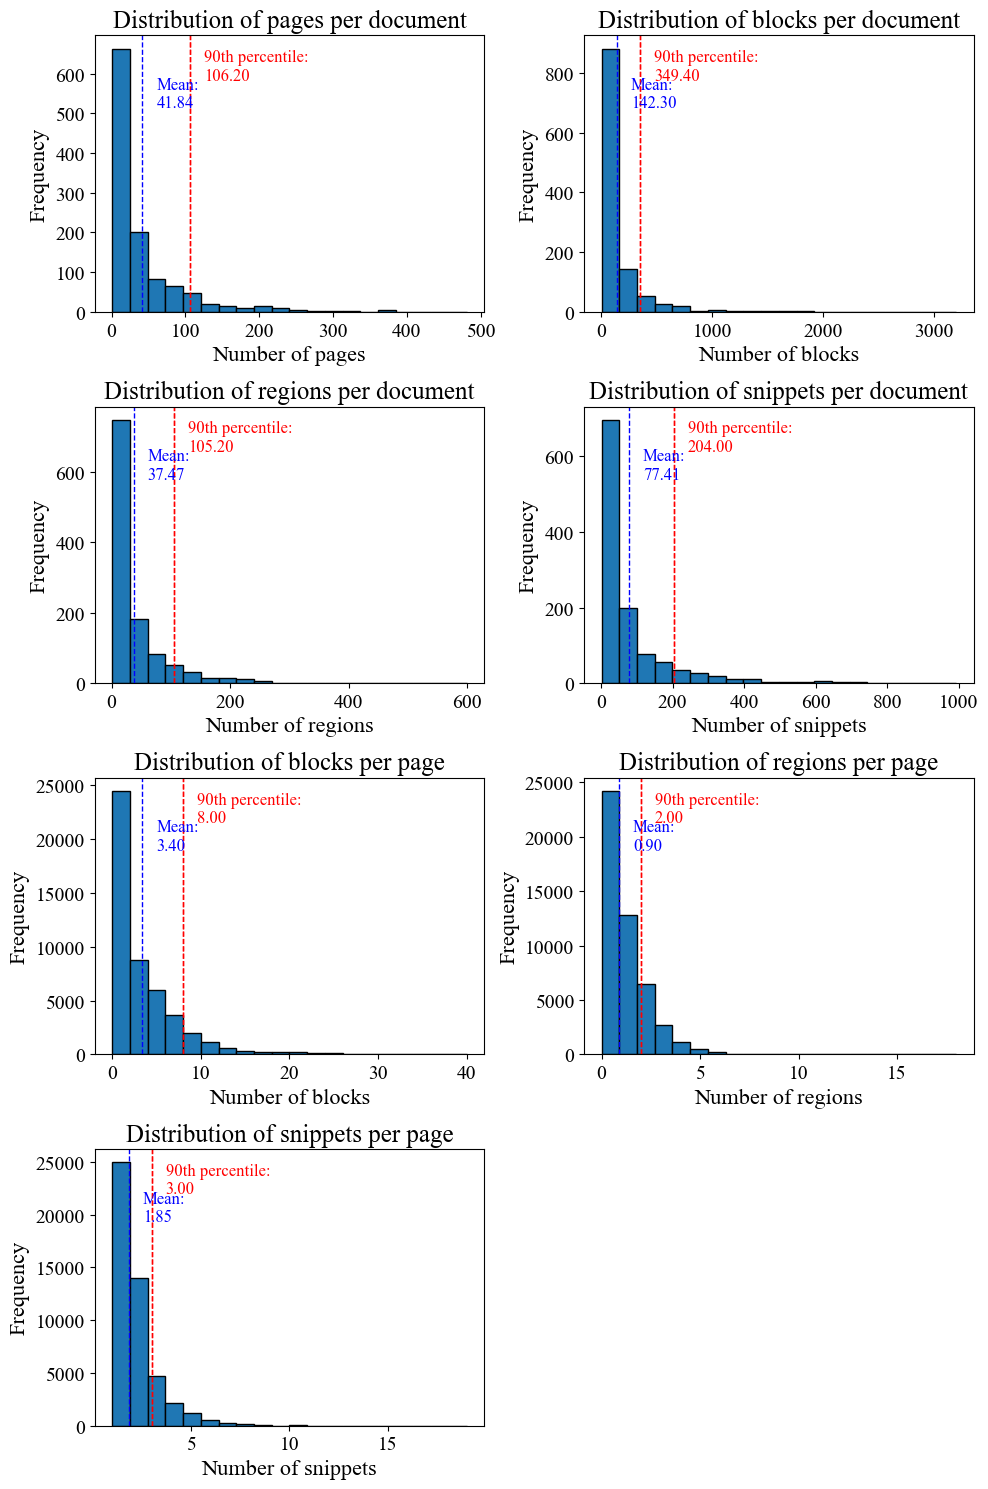

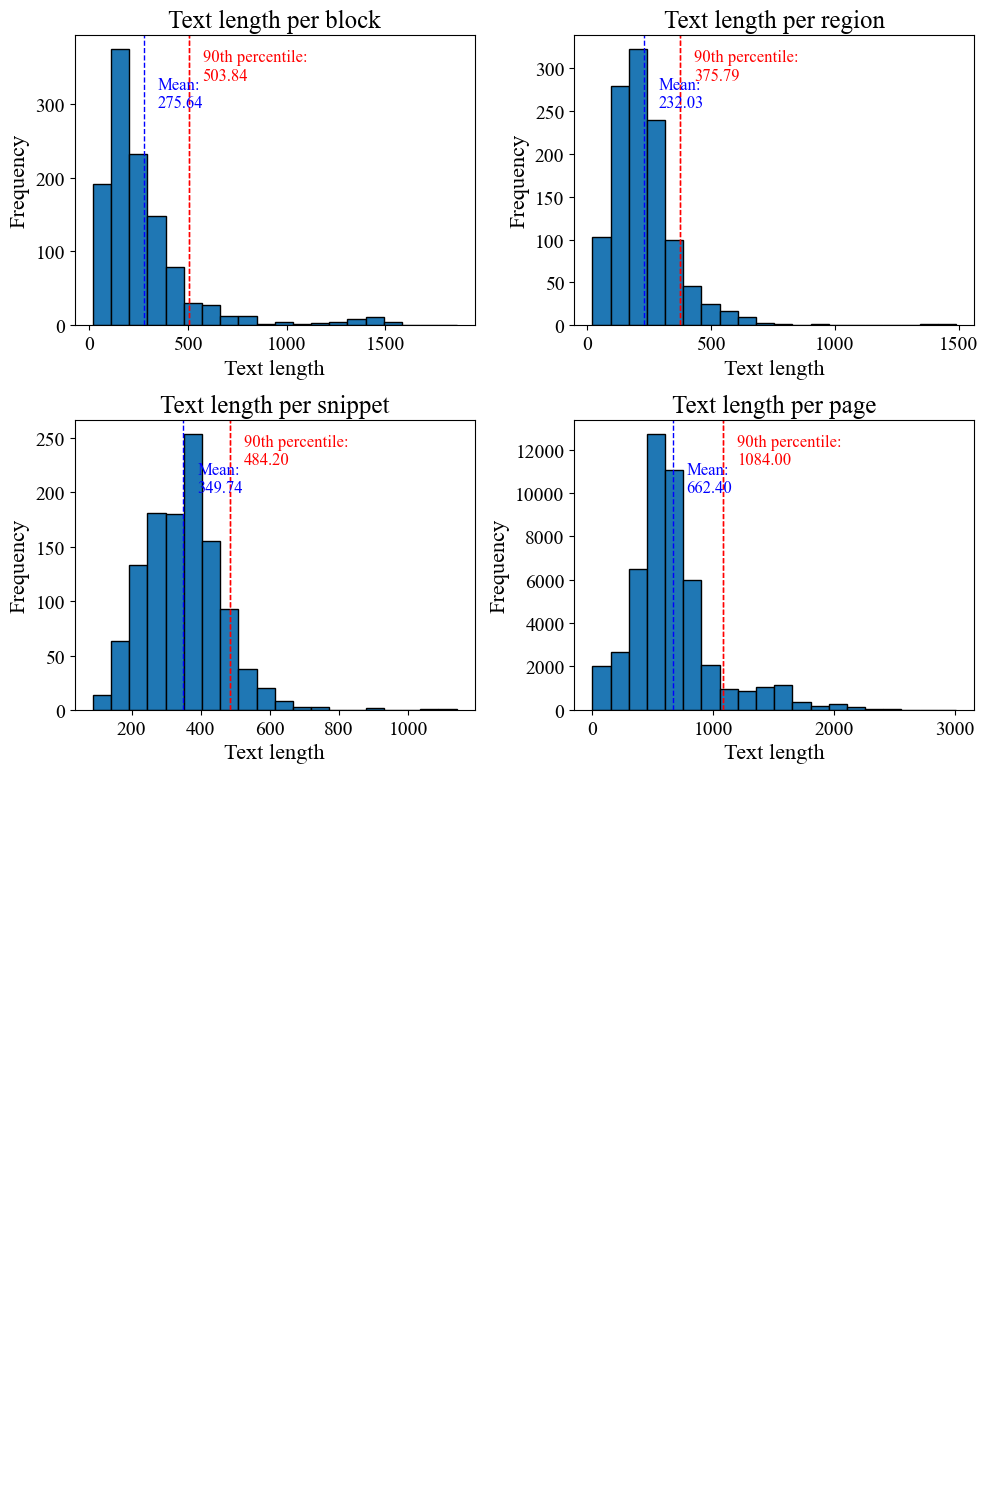

In [10]:
exclude_outliers = False
percentile = 90
avg = False
log = False
discrete_bins = False
info_str = " (Log Scale)" if log else ""

##############################

def filter_outliers(data):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if lower_bound <= x <= upper_bound]

def get_discrete_bins(data):
    min_val = int(min(data)) - 0.5
    max_val = int(max(data)) + 0.5
    return np.arange(min_val, max_val, 1)

# Extract values from dictionaries for histogram
pages_values = list(pages_per_doc.values())
blocks_values = list(blocks_per_doc.values())
regions_values = list(regions_per_doc.values())
snippet_values = list(snippets_per_doc.values())

blocks_per_page_values = blocks_per_page.copy()
regions_per_page_values = regions_per_page.copy()
snippets_per_page_values = snippets_per_page.copy()

page_lengths_values = page_lengths.copy()

avg_token_length_per_block_per_doc = []
avg_token_length_per_region_per_doc = []
avg_token_length_per_snippet_per_doc = []


for doc_id in tqdm(data_dict):
    block_lengths = []
    region_lengths = []
    snippet_lengths = []

    for page in data_dict[doc_id]:
        if page in ['title', 'doc_long_id']:
            continue

        for block in data_dict[doc_id][page]['blocks']:
            block_lengths.append(len(block['tokenized_text']))

        for region in data_dict[doc_id][page]['regions']:
            region_lengths.append(len(region['tokenized_text']))

        for snippet in data_dict[doc_id][page]['snippets']:
            snippet_lengths.append(len(snippet['tokenized_text']))

    
    # Calculate average lengths
    avg_block_length = np.mean(block_lengths) if block_lengths else 0
    avg_region_length = np.mean(region_lengths) if region_lengths else 0
    avg_snippet_length = np.mean(snippet_lengths) if snippet_lengths else 0

    avg_token_length_per_block_per_doc.append(avg_block_length)
    avg_token_length_per_region_per_doc.append(avg_region_length)
    avg_token_length_per_snippet_per_doc.append(avg_snippet_length)

# outlier check
if exclude_outliers:
    pages_values = filter_outliers(pages_values)
    blocks_values = filter_outliers(blocks_values)
    regions_values = filter_outliers(regions_values)
    snippet_values = filter_outliers(snippet_values)

    blocks_per_page_values = filter_outliers(blocks_per_page_values)
    regions_per_page_values = filter_outliers(regions_per_page_values)
    snippets_per_page_values = filter_outliers(snippets_per_page_values)

    avg_token_length_per_block_per_doc = filter_outliers(avg_token_length_per_block_per_doc)
    avg_token_length_per_region_per_doc = filter_outliers(avg_token_length_per_region_per_doc)
    avg_token_length_per_snippet_per_doc = filter_outliers(avg_token_length_per_snippet_per_doc)
    page_lengths_values = filter_outliers(page_lengths_values)


def annotate_statistic(ax, value, label, color='blue', line_style='dashed'):
    '''
    Helper functio use to annotate mean and percentile values on the histogram
    '''
    ylim = ax.get_ylim()
    ax.axvline(value, color=color, linestyle=line_style, linewidth=1)
    ax.annotate(f'{label}:\n{value:.2f}', 
                xy=(value, ylim[1]), 
                xytext=(10, -30 if 'Mean' in label else -10), 
                textcoords='offset points',
                verticalalignment='top',
                horizontalalignment='left',
                fontsize=12, 
                color=color)

# First plot
fig, axs = plt.subplots(4, 2, figsize=(10, 15)) 

# Define data sets and their corresponding titles
data_sets = [
    (pages_values, 'pages per document', 'Number of pages'),
    (blocks_values, 'blocks per document', 'Number of blocks'),
    (regions_values, 'regions per document', 'Number of regions'),
    (snippet_values, 'snippets per document', 'Number of snippets'),
    (blocks_per_page_values, 'blocks per page', 'Number of blocks'),
    (regions_per_page_values, 'regions per page', 'Number of regions'),
    (snippets_per_page_values, 'snippets per page', 'Number of snippets')
]

for ax, (data, title, xlabel) in zip(axs.flat, data_sets):
    mean_val = np.mean(data)
    percentile_val = np.percentile(data, percentile)

    # Plot histogram
    ax.hist(data, bins=get_discrete_bins(data) if discrete_bins else 20, edgecolor='black', log=log)
    ax.axvline(percentile_val, color='r', linestyle='dashed', linewidth=1)
    
    # Set titles and labels
    ax.set_title(f'Distribution of {title}{info_str}', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(f'Frequency{info_str}', fontsize=16)

    # Annotate mean and percentile
    annotate_statistic(ax, percentile_val, f'{percentile}th percentile', 'red')
    annotate_statistic(ax, mean_val, 'Mean', 'blue')

    ax.tick_params(axis='both', which='major', labelsize=14)

# Remov empty subplot if there's any
if len(axs.flat) > len(data_sets):
    for ax in axs.flat[len(data_sets):]:
        ax.axis('off')

plt.tight_layout()
plt.savefig("plots/distribution_text_elements.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()


# Second plot
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

data_sets = [
    (avg_token_length_per_block_per_doc, 'Avg Text Length per Block on Document Level', 'Text length per block'),
    (avg_token_length_per_region_per_doc, 'Avg Text Length per Region on Document Level', 'Text length per region'),
    (avg_token_length_per_snippet_per_doc, 'Avg Text Length per Snippet on Document Level', 'Text length per snippet'),
    (page_lengths_values, 'Text Length Per Page', 'Text length per page')
]

for ax, (data, title_avg, title_non_avg) in zip(axs.flatten(), data_sets):
    mean_val = np.mean(data)
    percentile_val = np.percentile(data, percentile)

    # Plot histogram
    ax.hist(data, bins=20, edgecolor='black')
    ax.axvline(percentile_val, color='r', linestyle='dashed', linewidth=1)
    
    # Set titles and labels
    ax.set_title(title_avg if avg else title_non_avg, fontsize=18)
    ax.set_xlabel('Average text length' if avg else 'Text length', fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)

    # Annotate mean and percentile
    annotate_statistic(ax, percentile_val, f'{percentile}th percentile', 'red')
    annotate_statistic(ax, mean_val, 'Mean', 'blue')

    ax.tick_params(axis='both', which='major', labelsize=14)

# Remove the empty subplot if there's any
if len(axs.flat) > len(data_sets):
    for ax in axs.flat[len(data_sets):]:
        ax.axis('off')

plt.tight_layout()
plt.savefig("plots/text_lengths.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()



### Show identified snippet types:

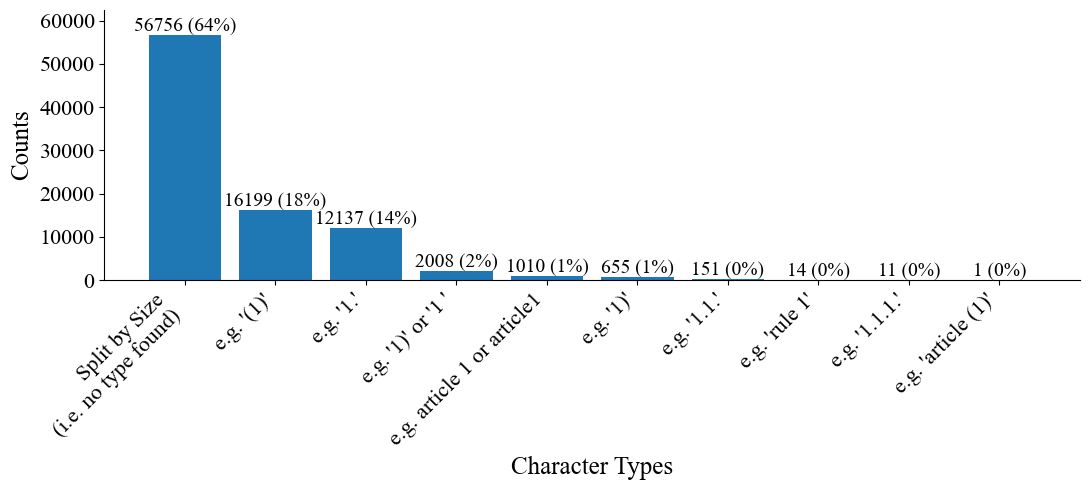

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Making sure to constantly reset colour palettes and styles for consistent plots throuhgtout the notebook
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_palette)

# Consolidating "Unknown" types and sorting by count
consolidated_counts = Counter()
for key, count in snippet_character_type_counts.items():
    description = character_type_descriptions.get(key, "Unknown")
    consolidated_counts[description if description else "Unknown"] += count

# Sorting by count in descending order
sorted_counts = dict(sorted(consolidated_counts.items(), key=lambda item: item[1], reverse=True))

bar_labels = sorted_counts.keys()
bar_values = sorted_counts.values()

plt.figure(figsize=(11, 5))
bars = plt.bar(bar_labels, bar_values, color=color_palette[0])

plt.xlabel('Character Types', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16) 
plt.yticks(fontsize=16)
plt.ylim(top=max(bar_values) * 1.1)

# Total sum of all bar values
total = sum(bar_values)

# Value labels with percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    percentage = f"{yval/total:.0%}"
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)} ({percentage})", va='bottom', ha='center', fontsize=14)

# Customize spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("plots/snippet_algorithm_character_types_found.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()


# Analyse for words

/tmp/ipykernel_1924335/1127440010.py:53: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



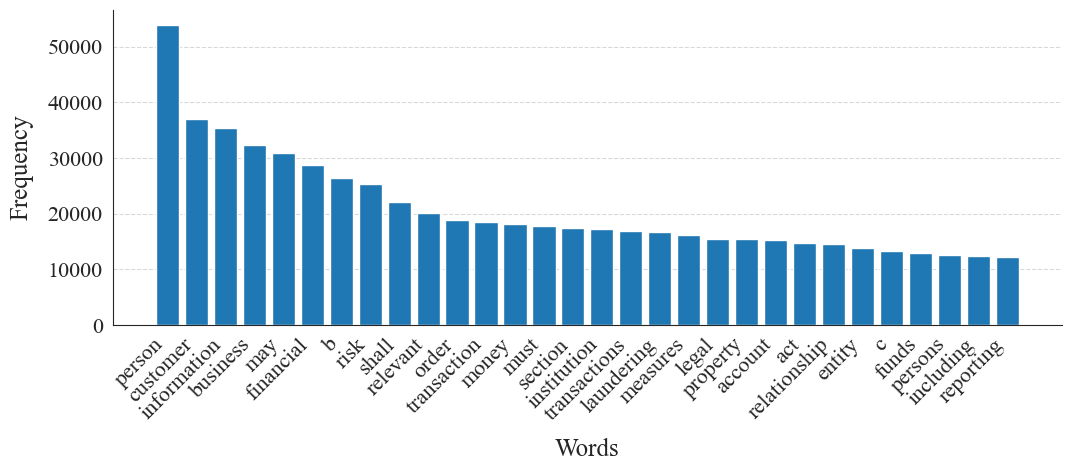

'\n# Word cloud plot\nplt.figure(figsize=(10, 9))\nwordcloud = WordCloud(width=800, height=600, background_color=\'white\', max_font_size=120, colormap=\'viridis\').generate(\' \'.join(words))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.tight_layout(pad=0)\nplt.savefig(\'plots/Word_Cloud.pdf\', dpi=300)  # Ensure DPI consistency\nplt.show()\n'

In [35]:
def process_text_from_data_dict(data_dict):
    # Combine text content from all blocks and regions in all documents
    text_content = []
    for doc_id, pages in data_dict.items():
        for page_index, content in pages.items():
            if page_index in ['title', 'doc_long_id']:
                continue
            for region in content['regions']:
                if region['text']:
                    text_content.append(region['text'].strip())
    
    return ' '.join(text_content)

data_dict = data_dict_aml
combined_text = process_text_from_data_dict(data_dict)

# Basic text processing using NLTK
tokens = word_tokenize(combined_text)
tokens = [w.lower() for w in tokens]
words = [word for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
freq_dist = nltk.FreqDist(words)

# Set Seaborn style and Matplotlib font
sns.set_style('white')
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 16}
plt.rc('font', **font)

# Get most common words for plotting
common_words = freq_dist.most_common(30)  # Show 30 words
words, counts = zip(*common_words)


fig, ax = plt.subplots(figsize=(11, 5))
bars = ax.bar(words, counts)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_xlabel('Words', fontsize=18, labelpad=10)
ax.set_ylabel('Frequency', fontsize=18, labelpad=10)
ax.set_xticklabels(words, rotation=45, ha='right', fontsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.savefig('plots/freq_distribution.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()